In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("index.csv")

In [4]:
print("Head of Dataset:\n", data.head())
print("\nData Info:\n")
data.info()

Head of Dataset:
          date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money      

In [5]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64


In [6]:
data['card'] = data['card'].fillna('Cash_Payment')

In [7]:
data['date'] = pd.to_datetime(data['date'])
data['datetime'] = pd.to_datetime(data['datetime'])

In [8]:
data['month'] = data['date'].dt.strftime('%Y-%m')
data['day'] = data['date'].dt.day_name()
data['hour'] = data['datetime'].dt.hour

In [9]:
print("\nTransformed Data Info:")
data.info()


Transformed Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), object(5)
memory usage: 75.4+ KB


In [10]:
revenue = data.groupby("coffee_name")["money"].sum().sort_values(ascending=False).reset_index()

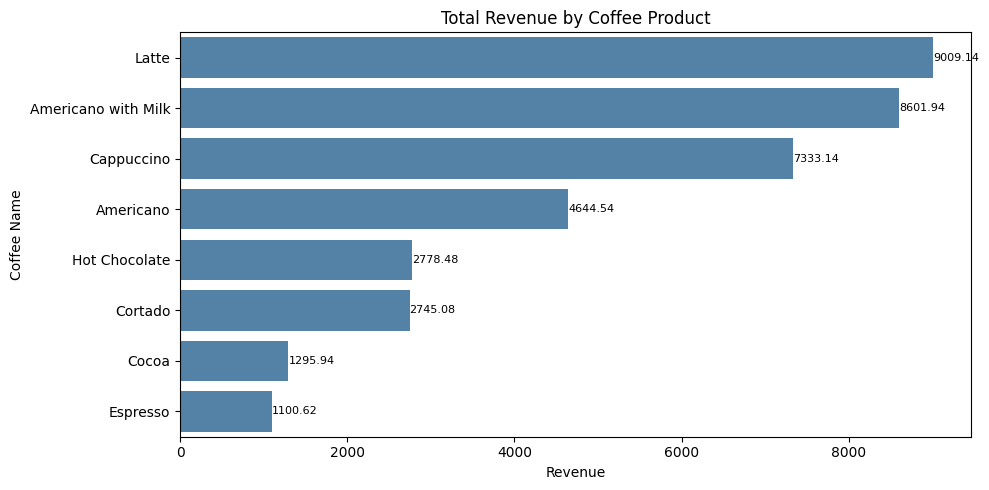

In [11]:
plt.figure(figsize=(10, 5))
ax = sns.barplot(data=revenue, y='coffee_name', x='money', color='steelblue')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title("Total Revenue by Coffee Product")
plt.xlabel("Revenue")
plt.ylabel("Coffee Name")
plt.tight_layout()
plt.show()

In [12]:
monthly_sales = data.groupby(['coffee_name', 'month']).size().reset_index(name='count')
pivot_monthly = monthly_sales.pivot(index='month', columns='coffee_name', values='count').fillna(0)

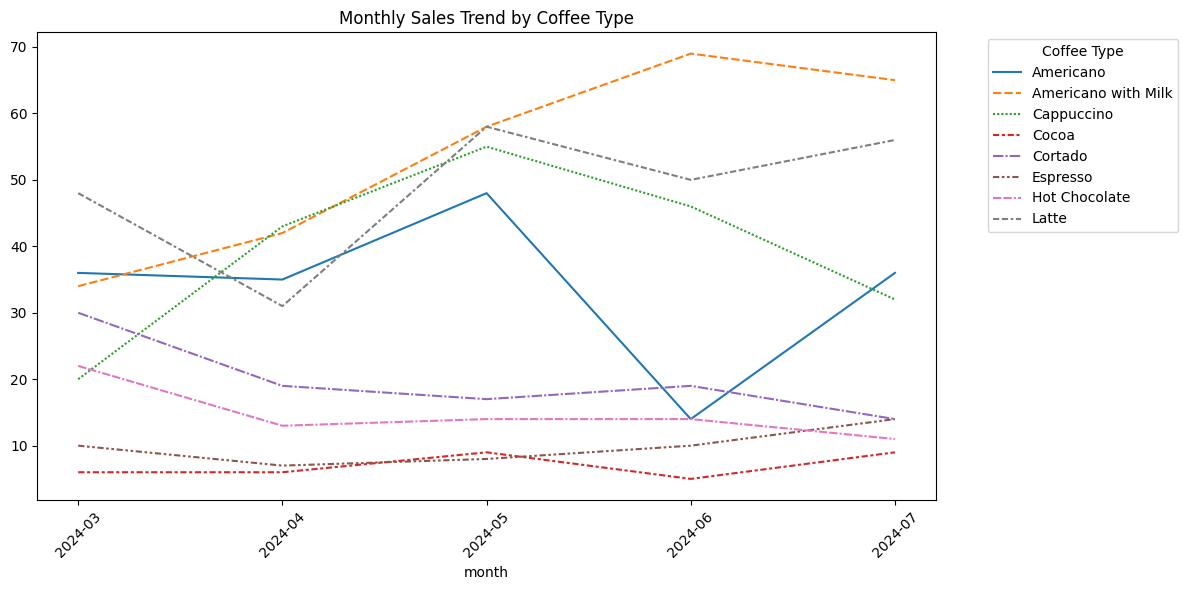

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_monthly)
plt.title("Monthly Sales Trend by Coffee Type")
plt.xticks(rotation=45)
plt.legend(title='Coffee Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [14]:
weekday_sales = data['day'].value_counts().reindex(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])

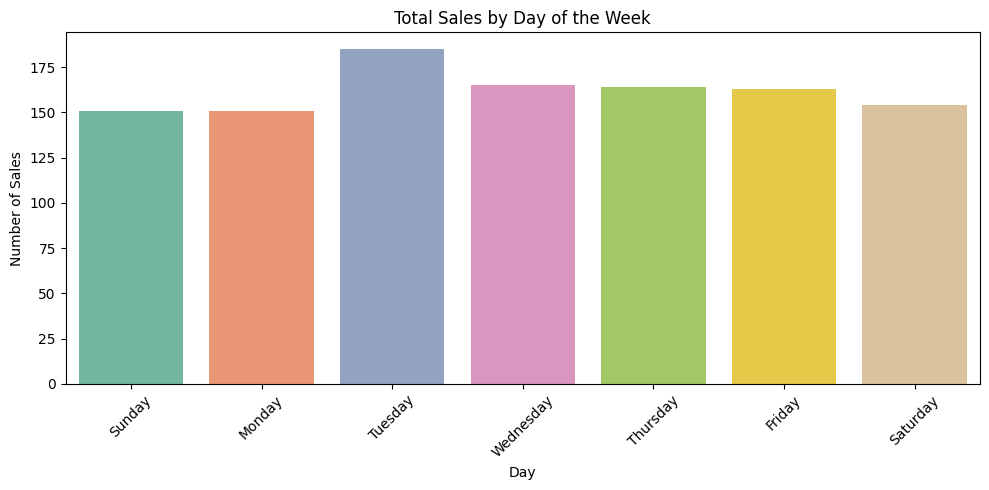

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='Set2')
plt.title("Total Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
hourly_sales = data['hour'].value_counts().sort_index()

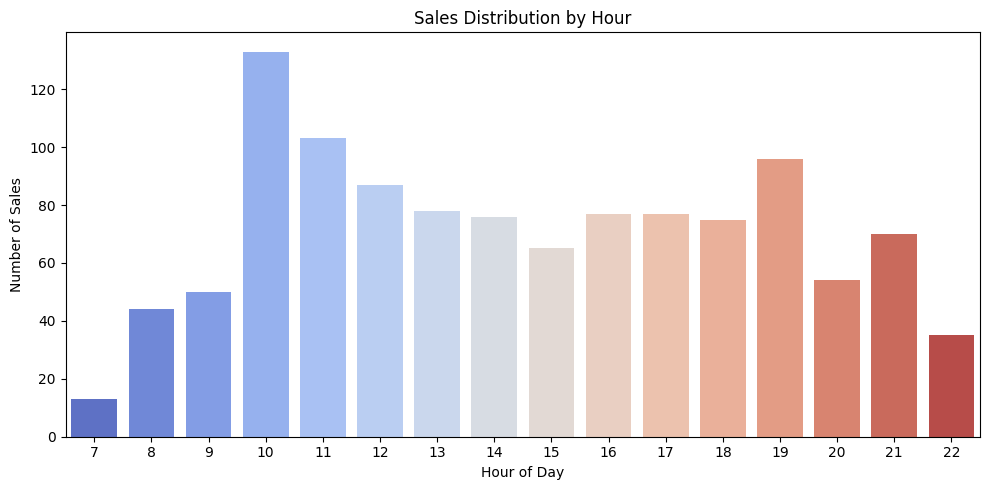

In [17]:
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_sales.index, y=hourly_sales.values, palette='coolwarm')
plt.title("Sales Distribution by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Sales")
plt.tight_layout()
plt.show()

In [18]:
hourly_coffee_sales = data.groupby(['hour', 'coffee_name']).size().unstack(fill_value=0)

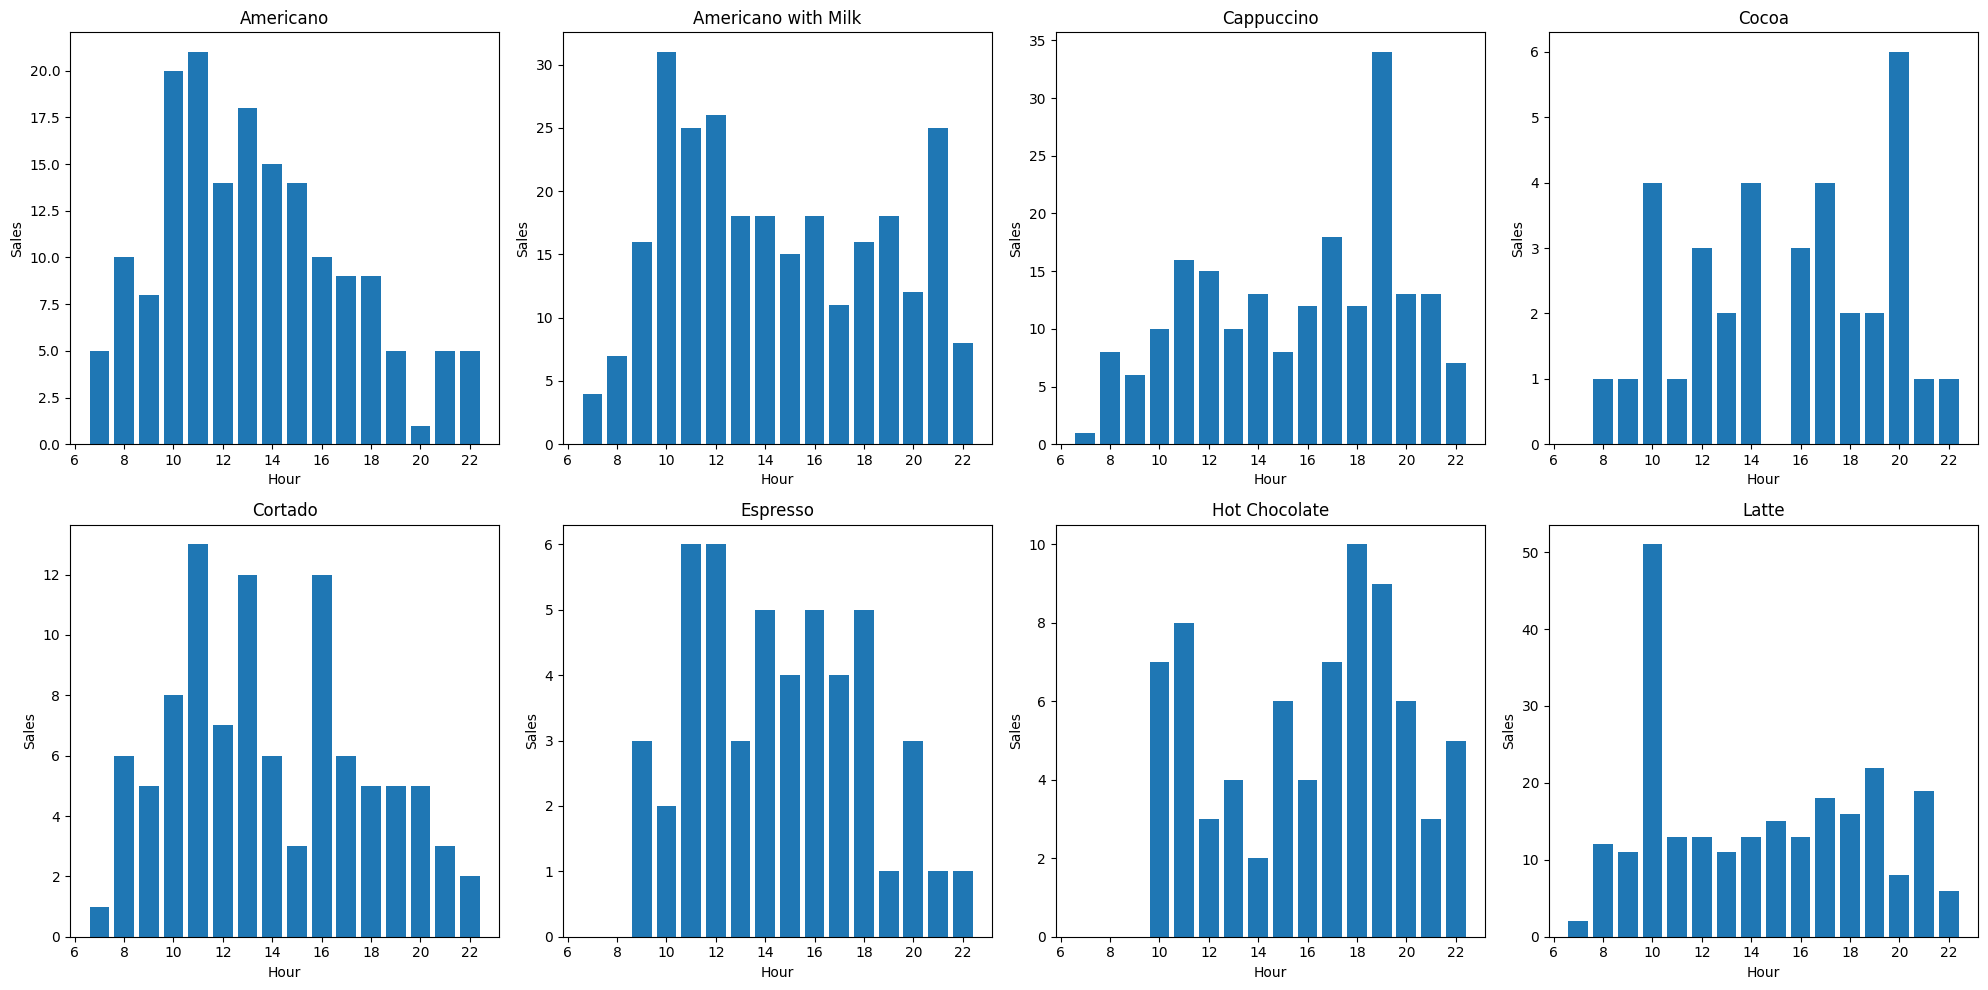

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()
for i, column in enumerate(hourly_coffee_sales.columns):
    axs[i].bar(hourly_coffee_sales.index, hourly_coffee_sales[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel('Sales')
plt.tight_layout()
plt.show()

In [20]:
daily_sales = data.groupby(['date', 'coffee_name']).size().unstack(fill_value=0)

<Figure size 1400x600 with 0 Axes>

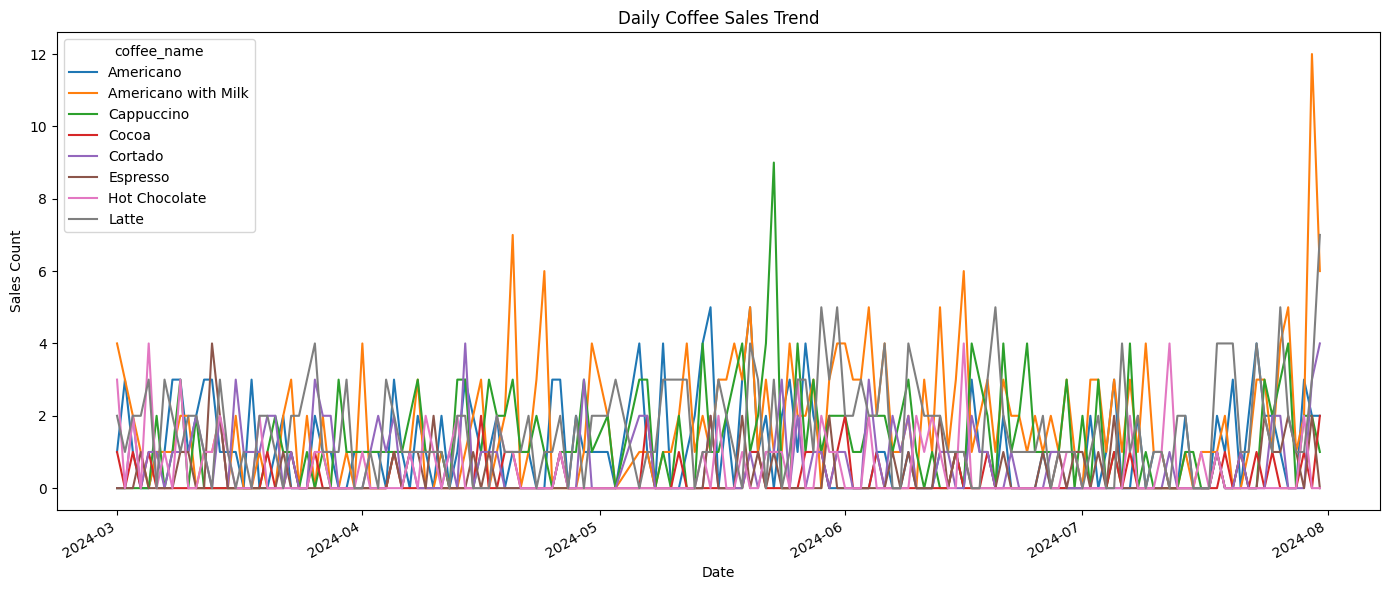

In [21]:
plt.figure(figsize=(14, 6))
daily_sales.plot(kind='line', figsize=(14, 6))
plt.title("Daily Coffee Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales Count")
plt.tight_layout()
plt.show()